In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('uberdrive.csv')

In [14]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [15]:
df.shape

(1155, 7)

In [16]:
df.isna().sum()


START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [17]:
df.dropna(subset=['PURPOSE*'],inplace=True)

In [18]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [19]:
df.shape

(653, 7)

In [20]:
df = df.rename(columns={'START_DATE*': 'start_date', 'END_DATE*':'end_date','CATEGORY*':'category','START*':'start','STOP*':'stop','MILES*':'miles','PURPOSE*':'purpose'})
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [28]:
n = len(pd.unique(df['start']))
print("Total Number of unique start locations :",
n)


Total Number of unique start locations : 131


In [29]:
stop= len(pd.unique(df['stop']))
print("Total Number of unique stop locations :",
stop)


Total Number of unique stop locations : 137


In [30]:
df_SanFrancisco = df.loc[df['start']=='San Francisco']
df_SanFrancisco


,start_date,end_date,category,start,stop,miles,purpose
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [21]:
df['category'].value_counts()

category
Business    647
Personal      6
Name: count, dtype: int64

In [22]:
start=df['start'].value_counts().head(10)
start.head(5)


start
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Name: count, dtype: int64

In [23]:
df['stop'].value_counts()

stop
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
Cedar Hill            1
Florence              1
Ridgeland             1
Daytona Beach         1
Ilukwatta             1
Name: count, Length: 137, dtype: int64

In [24]:
df['purpose'].value_counts()

purpose
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [34]:
df_freq = pd.DataFrame(df.groupby('start')['stop'].value_counts().
sort_values(ascending=False).head(2))
print (df_freq)

                         count
start       stop              
Cary        Morrisville     52
Morrisville Cary            51


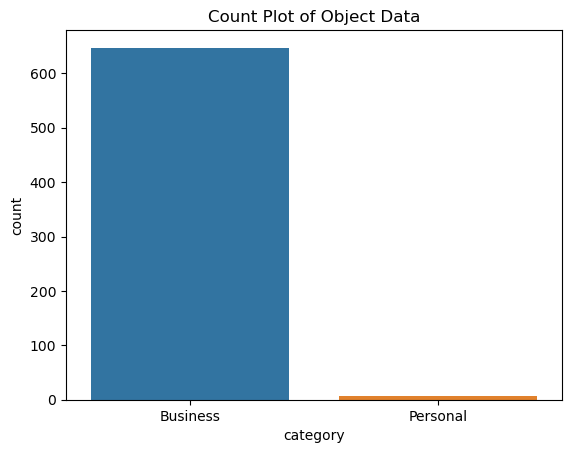

In [25]:
sns.countplot(data=df, x='category')
plt.title('Count Plot of Object Data')
plt.show()

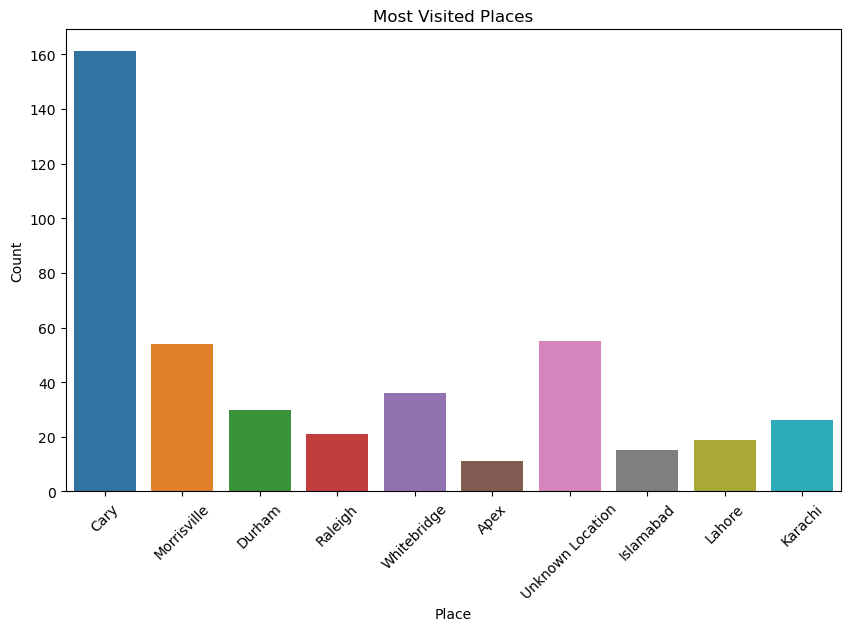

In [26]:
df_filtered = df[df['start'].isin(start.index)]

# Step 3: Create a count plot using the filtered data
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=df_filtered, x='start')
plt.title('Most Visited Places')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5336\787494314.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='miles', y='purpose', estimator = np.sum, data=df,ci=None)


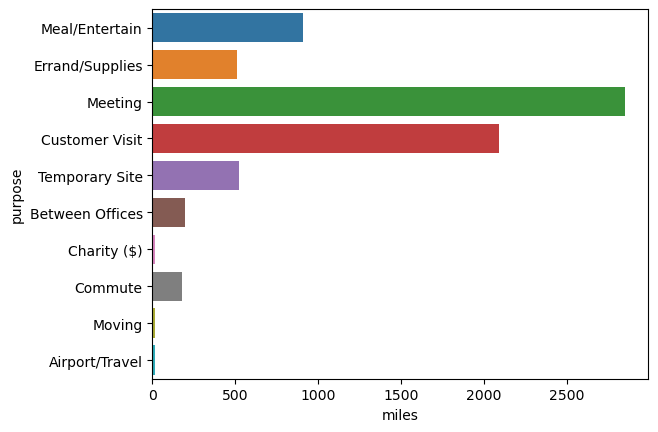

In [36]:
sns.barplot( x='miles', y='purpose', estimator = np.sum, data=df,ci=None)
plt.show()

In [ ]:
df_purpose = pd.DataFrame(uber_drives.groupby('PURPOSE*')['MILES*'].sum())
display(df_purpose)

In [38]:
df_purpose=pd.DataFrame(df.groupby('purpose')['miles'].sum())
display(df_purpose)

,miles
purpose,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


In [40]:
Category_Miles = df.groupby(by=['category'])['miles'].sum()
Category_Miles

category
Business    7097.7
Personal     213.5
Name: miles, dtype: float64

In [41]:
Total_Miles = round(Category_Miles[0] + Category_Miles[1])
Total_Miles

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5336\3357388740.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Total_Miles = round(Category_Miles[0] + Category_Miles[1])


7311